# **Proyecto final: Péndulo doble.**
## Por: Juan Esteban Ospina Holguín. 1007374246

Un péndulo doble es un sistema físico en el que se acoplan dos pendulos simples. Primero, se une un péndulo a un pivote y sobre la masa de este se une un segundo péndulo.

![Imagen](https://www.famaf.unc.edu.ar/~pury/famaf.gui/mecanica/guia2/img46.gif)


Cuando se estudió el péndulo simple, este tenía oscilaba con un periodo constante y su movimiento era sencillo. Con un péndulo doble normalmente se tiene un comportamiento que no es fácil de predecir con la intuición. 

Las ecuaciones para este sistema son de la forma:



\begin{array}{ll}
a_1\ddot{\theta_1} + b_1\ddot{\theta_2} + c_1 = 0 \\
a_2\ddot{\theta_2} + b_2\ddot{\theta_1} + c_2  = 0
\end{array}



El objetivo de este proyecto es mostrar como es el movimiento de este sistema bajo unas condiciones iniciales controladas. Para esto demos solución al sistema de ecuaciones diferenciales numericamente usando la librería Scipy.

In [ ]:
#Librerías
import numpy as np                
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import os
!sudo apt-get install imagemagick

In [8]:
g = 9.8 #Aceleración de la gravedad [m/s^2]
 
class DoublePendulum(object):
    def __init__(self, m1, m2, l1, l2):
        """Función que asigna las condiciones de masas y
        longitudes de las varillas iniciales a un arreglo de numpy"""
        self.m1, self.m2, self.l1, self.l2 = m1, m2, l1, l2
        self.init_status = np.array([0.0,0.0,0.0,0.0])
 
    def equations(self, w, t):
        """ Ecuaciones del sistema de péndulos"""
        m1, m2, l1, l2 = self.m1, self.m2, self.l1, self.l2 #Se asignan los parametros de masa y 
                                                            #longitud definidos anteriormente
            
        th1, th2, v1, v2 = w
        dth1 = v1 #Velocidad angular de θ1
        dth2 = v2 #Velocidad angular de θ2
        
        #Ecuación para θ1
        a = l1*l1*(m1+m2) 
        b = l1*m2*l2*np.cos(th1-th2) 
        c = l1*(m2*l2*np.sin(th1-th2)*dth2**2 + (m1+m2)*g*np.sin(th1))
        
        #Ecuación para θ2
        d = m2*l2*l1*np.cos(th1-th2) 
        e = m2*l2*l2 
        f = m2*l2*(-l1*np.sin(th1-th2)*dth1**2 + g*np.sin(th2))
        
        dv1, dv2 = np.linalg.solve([[a,b],[d,e]], [-c,-f]) #Se escriben las ecuaciones como un sistema de algebra lineal
        
        return np.array([dth1, dth2, dv1, dv2])
 
def double_pendulum_odeint(pendulum, ts, te, tstep):
    """
        Esta función soluciona el sistema de ecuaciones diferenciales y devuelve 
        las cordenadas para las posiciones de las dos masas en el tiempo
    """
    t = np.arange(ts, te, tstep) #Tiempo en que el se deja actuar el sistema
    angulos = odeint(pendulum.equations, pendulum.init_status, t) #Valores de los angulos producto de 
                                                                  #la solución de las ecuaciones diferenciales
    
    θ1_array, θ2_array = angulos[:,0], angulos[:, 1]#Se asigna cada conjunto de datos a cada ángulo
    l1, l2 = pendulum.l1, pendulum.l2
    
    x1 = l1*np.sin(θ1_array)#Se calculan las cordenadas de las masas 
    y1 = -l1*np.cos(θ1_array)
    x2 = x1 + l2*np.sin( θ2_array )
    y2 = y1 - l2*np.cos( θ2_array )
    pendulum.init_status = angulos[-1 ,:].copy() # Asigna el estado final al péndulo
    return [x1, y1, x2, y2]
 


Ahora, hagamos el grafico para un péndulo con masas $m_1 = 1kg$, $m_2 = 2kg$, $l_1 = 1m$, $l2 = 1m$, que se suelta extendido completamente horizontal.

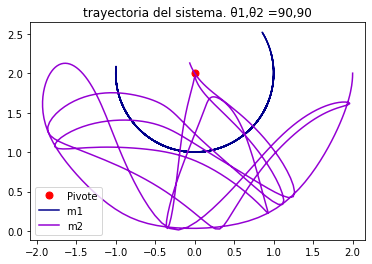

In [22]:
m1 = 1
m2 = 2
l1 = 1
l2 = 1

θ1 = 90
θ2 = 90

tf = 10 #Tiempo en que el se deja actuar el sistema
Δt = 0.02 #paso en el que se incrementa el tiempo entre posiciones

pendulum = DoublePendulum( m1, m2, l1, l2) # Se inicia la clase definida para el péndulo doble con 
                                           #las masas y longitudes definidas
    
pendulum.init_status[:2] = np.deg2rad(θ1), np.deg2rad(θ2)        #Se asignan los valores iniciales de angulos a la clase
x1, y1, x2, y2 = double_pendulum_odeint(pendulum, 0, tf, Δt) 
plt.plot(0,l1+l2,'o',markersize = 7, color = 'red',label = "Pivote")
plt.plot (x1, y1+l1+l2, label = "m1 ",color = "darkblue")
plt.plot (x2, y2+l1+l2, label = "m2", color = "darkviolet")
plt.title ("trayectoria del sistema. θ1,θ2 =% s,% s"% (θ1, θ2))
plt.legend()
plt.axis("equal");

Finalmente, realizamos una pequeña animación para ver la evoluvión del sistema con un archivo gif.

In [21]:
for i in range(len(x1)):
    plt.plot(x1[i], y1[i]+l1+l2,'o', label = "m1 ",color = "darkblue",  markersize = 7)
    plt.plot(x2[i], y2[i]+l1+l2,'o', label = "m2", color = "darkgreen", markersize = 7)
    x = [x1[i],x2[i]]
    y = [y1[i]+l1+l2,y2[i]+l1+l2]
    X = [0,x1[i]]
    Y = [l1+l2,y1[i]+l1+l2]
    plt.plot(x,y,color = 'black')
    plt.plot(X,Y,color = 'black')
    plt.plot(0,l1+l2,'o',markersize = 7, color = 'red',label = "Pivote")
    plt.xlim(-l1-l2-0.2,l1+l2+0.2)
    plt.ylim(-0.2,l1+l2+0.2)
    plt.savefig('p% s'%i)
    plt.clf()

os.system("rm *.gif")
os.system(f"convert p%d.png[0-{i}] animacion.gif")
os.system("rm *.png")

0

<Figure size 432x288 with 0 Axes>

A manera de conclusion, notamos que si $m1 << m2$ el sistema tiende a comportarse como un solo pendulo. La animación del péndulo se puede ver [*Aquí*](https://drive.google.com/file/d/1-G_FC096lZHbOI0seIz9THaI_-M7kniH/view?usp=sharing).